In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set_theme()

# 1. Постановка задачи:

Используя метод переменных направлений, решить краевую задачу:

$$
\begin{cases}
\frac{\partial u}{\partial t} = \Delta u, \quad 0 < x < \pi, \quad 0 < y < 2\pi, \quad t > 0 \\
u \bigg|_{x=0} = u \bigg|_{x=\pi} = 0 \\
\frac{\partial u}{\partial y} \bigg|_{y=0} = \frac{\partial u}{\partial y} \bigg|_{y=2\pi} = 0 \\
u \bigg|_{t=0} = \sin 3x \cos y
\end{cases}
$$


# 2. Аналитическое решение задачи

Будем искать решение задачи в виде:  
$$ u(x, y, t) = T(t)V(x, y) $$

Тогда, решая исходную задачу методом разделения переменных, получаем:  
$$ \frac{T'(t)}{T(t)} = \frac{V''(x, y)}{V(x, y)} = -\lambda $$

Имеем две задачи: Задачу Коши и Задачу Штурма-Лиувилля:

$$
\begin{cases}
T' + \lambda T = 0 \\
T(0) = 0
\end{cases}
\quad
\begin{cases}
V'' + \lambda V = 0 \\
V|_{x=0} = V|_{x=\pi} = 0 \\
\frac{\partial V}{\partial y}\bigg|_{y=0} = \frac{\partial V}{\partial y}\bigg|_{y=2\pi} = 0
\end{cases}
$$

Теперь, представляя функцию \( V \) в виде \( V(x, y) = X(x)Y(y) \) и применяя метод разделения переменных, получим две задачи Штурма-Лиувилля на отрезке:

$$
\begin{cases}
X'' + \nu X = 0 \\
X|_{x=0} = X|_{x=\pi}
\end{cases}
\Rightarrow X = \sin(\sqrt{\nu} x)
$$

где
$$
\mu = \left(\frac{m}{2}\right)^2, \quad \nu = n^2, \quad \lambda = \mu + \nu,
$$

$$
\begin{cases}
Y'' + \mu Y = 0 \\
\frac{\partial Y}{\partial y}\bigg|_{y=0} = \frac{\partial Y}{\partial y}\bigg|_{y=2\pi} = 0
\end{cases}
\Rightarrow Y = \cos(\sqrt{\mu} y)
$$

Тогда для функции V получаем:

$$
 V_{nm} = \cos\left(\frac{my}{2}\right)\sin(nx) 
$$

Из начальных условий получаем, что \( $n = 3, m = 2 \Rightarrow \lambda = 10 \$)

Тогда, с учетом, что решение представляется в виде:

$$ V = \sum_{n=0}^{\infty}\sum_{m=0}^{\infty}V_{nm}(x, y)T_{nm}(t) $$

Получаем решение:

$$ u(x, y, t) = \sin(3x)\cos(y)e^{-10t} $$


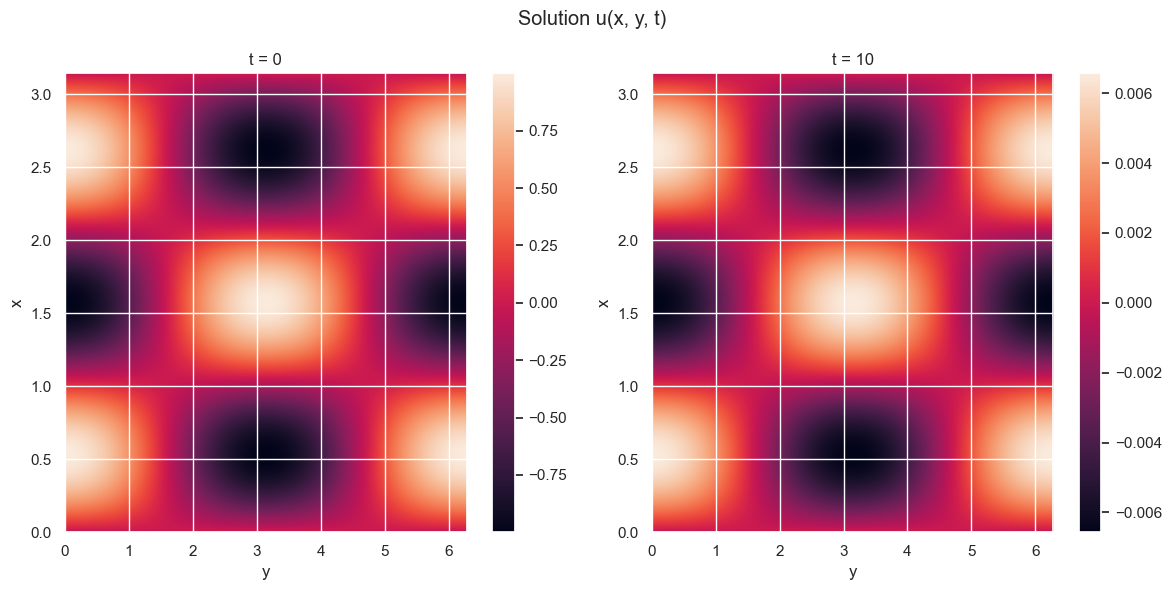

In [18]:
# Parameters
N, M, T = 200, 200, 200
x_start, x_end = 0, np.pi
y_start, y_end = 0, 2 * np.pi
t_start, t_end = 0, 10
tau = t_end / (T - 1)

# Create grid values
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, M)
t = np.linspace(t_start, t_end, T)

# Vectorize computations using meshgrid
X, Y, T_ = np.meshgrid(x, y, t, indexing='ij')
u_a = np.sin(3 * X) * np.cos(Y) * np.exp(-10 * T_ * tau)

# Visualization for initial and final time steps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Initial time step
im1 = axes[0].imshow(u_a[:, :, 0], extent=(y_start, y_end, x_start, x_end), origin='lower', aspect='auto')
axes[0].set_title('t = 0')
axes[0].set_xlabel('y')
axes[0].set_ylabel('x')
fig.colorbar(im1, ax=axes[0])

# Final time step
im2 = axes[1].imshow(u_a[:, :, -1], extent=(y_start, y_end, x_start, x_end), origin='lower', aspect='auto')
axes[1].set_title(f't = {t_end}')
axes[1].set_xlabel('y')
axes[1].set_ylabel('x')
fig.colorbar(im2, ax=axes[1])

plt.suptitle('Solution u(x, y, t)')
plt.tight_layout()

Text(0.5, 0.92, 'Analytical Solution at t = 5.03')

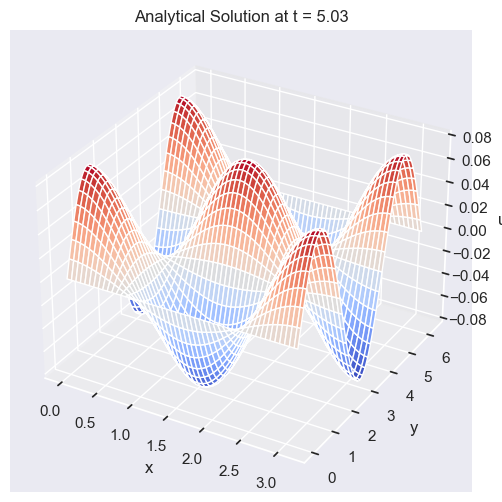

In [19]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
x1, y1 = np.meshgrid(x, y)
ax.plot_surface(x1, y1, u_a[:, :, int(T / 2)], rstride=4, cstride=4, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('Analytical Solution at t = ' + str(round(tau * T / 2, 2)))

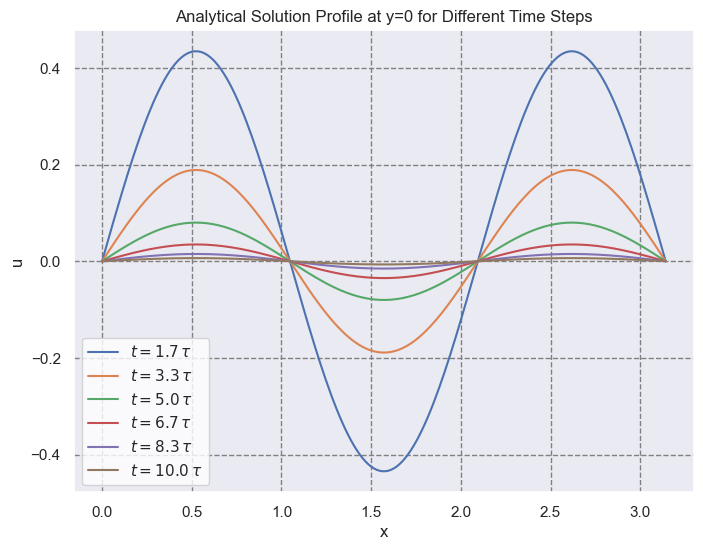

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

# Define x again to avoid conflicts (if necessary)
x = np.linspace(x_start, x_end, N)

ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Analytical Solution Profile at y=0 for Different Time Steps')

# Plot profiles at different time steps
time_steps = [int(T/6), int(2*T/6), int(3*T/6), int(4*T/6), int(5*T/6), T-1]
labels = [f'$t={round(tau * step, 1)} \\, \\tau$' for step in time_steps]

for step, label in zip(time_steps, labels):
    ax.plot(x, u_a[:, 0, step], label=label)

ax.grid(which='major', color='gray', linestyle='--')
ax.legend(loc='best', facecolor='w')

# Численное решение

## 4. Схема переменных направлений

Для применения схемы введем в расчетной области двумерную пространственную и одномерную временную сетку:

$$
x_n = nh_x, \quad n = 0, N - 1, \quad Nh_x = \pi
$$

$$
y_m = -\frac{h_y}{2} + mh_y, \quad m = 0, M - 1, \quad Mh_y = 2\pi
$$

$$
t_j = jt, \quad j = 0, J - 1, \quad J\tau = T
$$

где $h_x$, $h_y$ и $\tau$ — шаги по координатам $x$, $y$ и $t$ соответственно. С учетом того, что по переменной $y$ мы имеем условия Неймана на обоих границах, будем рассматривать фиктивные узлы в окрестности этих границ.

Далее заменим дифференциальные операторы $\frac{\partial^2}{\partial x^2}$ и $\frac{\partial^2}{\partial y^2}$ их разностными аналогами:

$$
\Lambda_1 u = \frac{u_{n-1,m} - 2u_{n,m} + u_{n+1,m}}{h_x^2}
$$

$$
\Lambda_2 u = \frac{u_{n,m-1} - 2u_{n,m} + u_{n,m+1}}{h_y^2}
$$

Где используется обозначение $u_{n,m} = u(x_n, y_m, t_j)$. Решение разностной задачи будем обозначать функцией $\omega$.

Таким образом, мы сделали переход от дифференциальной задачи к разностной следующим образом:

$$
L \omega \rightarrow \Lambda_1 \omega + \Lambda_2 \omega
$$


В данной задаче используется схема переменных направлений, которая чередует явные и неявные схемы для каждой пространственной переменной на каждом временном шаге.

### Переход со слоя $ j $ на слой $ j + \frac{1}{2} $

На этом этапе используется неявная схема по $ x $ и явная схема по $ y $:

$$
\frac{\omega_{n,m}^{j+ \frac{1}{2}} - \omega_{n,m}^j}{0.5\tau} = \Lambda_1 \omega_{n,m}^{j+ \frac{1}{2}} + \Lambda_2 \omega_{n,m}^j + f_{n,m}^{j+ \frac{1}{2}}
$$

Где:

$$
\Lambda_1 \omega_{n,m}^{j+ \frac{1}{2}} = \frac{\omega_{n-1,m}^{j+ \frac{1}{2}} - 2\omega_{n,m}^{j+ \frac{1}{2}} + \omega_{n+1,m}^{j+ \frac{1}{2}}}{h_x^2}
$$

$$
\Lambda_2 \omega_{n,m}^j = \frac{\omega_{n,m-1}^j - 2\omega_{n,m}^j + \omega_{n,m+1}^j}{h_y^2}
$$

Решаем систему уравнений для $ \omega_{n,m}^{j+ \frac{1}{2}} $.

### Переход со слоя $ j + \frac{1}{2} $ на слой $ j + 1 $

На этом этапе используется явная схема по $ x $ и неявная схема по $ y $:

$$
\frac{\omega_{n,m}^{j+ 1} - \omega_{n,m}^{j+ \frac{1}{2}}}{0.5\tau} = \Lambda_1 \omega_{n,m}^{j+ \frac{1}{2}} + \Lambda_2 \omega_{n,m}^{j+ 1} + f_{n,m}^{j+ \frac{1}{2}}
$$

Где:

$$
\Lambda_1 \omega_{n,m}^{j+ \frac{1}{2}} = \frac{\omega_{n-1,m}^{j+ \frac{1}{2}} - 2\omega_{n,m}^{j+ \frac{1}{2}} + \omega_{n+1,m}^{j+ \frac{1}{2}}}{h_x^2}
$$

$$
\Lambda_2 \omega_{n,m}^{j+ 1} = \frac{\omega_{n,m-1}^{j+ 1} - 2\omega_{n,m}^{j+ 1} + \omega_{n,m+1}^{j+ 1}}{h_y^2}
$$

Решаем систему уравнений для $ \omega_{n,m}^{j+ 1} $.


## Дополнение к схеме переменных направлений (ADI)

Таким образом, рассматривая первое уравнение системы и добавляя к нему граничные условия по $x$, для каждого из фиксированных значений $y_m$ полученное уравнение можно решить методом прогонки.

Далее, зная значения функции на полуцелых слоях, дополним второе из уравнений системы граничными условиями по $y$ и аналогично первому случаю, решим для каждого из фиксированных значений $x_n$ систему методом прогонки.

### Начальные условия

Начальные условия нашей задачи аппроксимируются точкой:

$$
\omega_{n,m}^0 = \omega_{n,m}^0, \quad n = 0, N, \quad m = 0, M
$$

Причем в силу однородности начальных условий в задаче, данные условия применимы и для полуцелых слоев.

### Граничные условия

Граничные условия аппроксимируются на каждом временном слое $j$ следующим образом:

$$
\omega_{0,m}^j = \omega_{N,m}^j = 0, \quad m = 0, M
$$

$$
\frac{\omega_{n,1}^j - \omega_{n,0}^j}{h_y} = \frac{\omega_{n,M}^j - \omega_{n,M-1}^j}{h_y} = 0, \quad n = 0, N
$$

### Явные операторы и математические преобразования

Таким образом, переписывая операторы в явном виде и проделывая некоторые математические преобразования, получаем следующее:

$$
\begin{cases}
0.5 \gamma_1 \omega_{n-1,m}^{j+0.5} - (1 + \gamma_1) \omega_{n,m}^{j+0.5} + 0.5 \gamma_1 \omega_{n+1,m}^{j+0.5} = -( (1 - \gamma_2) \omega_{n,m}^j + 0.5 \gamma_2 (\omega_{n,m-1}^j + \omega_{n,m+1}^j) ), & m = 1, \quad M-1 \\
0.5 \gamma_2 \omega_{n,m-1}^{j+1} - (1 + \gamma_2) \omega_{n,m}^{j+1} + 0.5 \gamma_2 \omega_{n,m+1}^{j+1} = -( (1 - \gamma_1) \omega_{n,m}^{j+0.5} + 0.5 \gamma_1 (\omega_{n-1,m}^{j+0.5} + \omega_{n+1,m}^{j+0.5}) ), & n = 1, \quad N-1
\end{cases}
$$

Где $ \gamma_1 = \frac{\tau}{h_x} $, $ \gamma_2 = \frac{\tau}{h_y} $.

Таким образом, если ввести коэффициенты $ A_x = C_x = 0.5 \gamma_1 $, $ B_x = 1 - \gamma_1 $ и $ A_y = C_y = 0.5 \gamma_2 $, $ B_y = 1 - \gamma_2 $, то получим системы уравнений, которые можно решить методом прогонки.

### Пояснение коэффициентов

**$\gamma_1$ и $\gamma_2$**:
- $\gamma_1 = \frac{\tau}{h_x}$: Это безразмерный коэффициент, представляющий отношение шага по времени $\tau$ к квадрату шага по пространственной переменной $x$.
- $\gamma_2 = \frac{\tau}{h_y}$: Это безразмерный коэффициент, представляющий отношение шага по времени $\tau$ к квадрату шага по пространственной переменной $y$.

**Коэффициенты $A_x$, $C_x$, $B_x$, $A_y$, $C_y$, $B_y$**:
- $A_x = C_x = 0.5 \gamma_1$: Коэффициенты перед соседними узлами $n-1$ и $n+1$ при решении методом прогонки по $x$.
- $B_x = 1 - \gamma_1$: Коэффициент перед центральным узлом $n$ при решении методом прогонки по $x$.
- $A_y = C_y = 0.5 \gamma_2$: Коэффициенты перед соседними узлами $m-1$ и $m+1$ при решении методом прогонки по $y$.
- $B_y = 1 - \gamma_2$: Коэффициент перед центральным узлом $m$ при решении методом прогонки по $y$.


## Метод прогонки

Метод прогонки, используемый в данной задаче, основывается на решении линейных систем с трехдиагональной матрицей. Рассмотрим систему:

$$
\begin{cases}
- c_0 y_0 + b_0 y_1 = -f_0 \\
a_i y_{i-1} - c_i y_i + b_i y_{i+1} = -f_i, \quad i = 1, N-1 \\
a_N y_{N-1} - c_N y_N = -f_N
\end{cases}
\quad (4)
$$

Если $c_0 \neq 0$, то выразим первый элемент системы: $y_0 = \alpha_0 y_1 + \beta_0$, где $\alpha_0 = \frac{b_0}{c_0}$, $\beta_0 = \frac{f_0}{c_0}$. Подставим $y_0$ во второе уравнение и найдем связь между $y_1$ и $y_2$. Данный процесс мы можем продолжать рекуррентно, получая, таким образом, следующую систему:

$$
\begin{cases}
y_i = \alpha_i y_{i+1} + \beta_i, \quad i = 0, N-1 \\
y_N = \beta_N
\end{cases}
\quad (5)
$$

Именно с помощью этой системы мы осуществляем **прямой ход прогонки** - нахождение коэффициентов системы по следующим формулам:

$$
\alpha_i = \frac{b_i}{c_i - a_i \alpha_{i-1}}
$$

$$
\beta_i = \frac{f_i + a_i \beta_{i-1}}{c_i - a_i \alpha_{i-1}}
$$

В задаче мы будем использовать метод прогонки дважды, соответственно, используя равенства $b_i = B_y, c_i = C_y$ при прогонке по $y$ и $a_i = A_x, b_i = B_x, c_i = C_x$ при прогонке по $x$.

Затем, по найденным коэффициентам, мы можем найти значения функции $y_i$ по методу **обратной прогонки**.


In [41]:
class ADI_Solver:
    def __init__(self, N, M, T, x_start, x_end, y_start, y_end, t_start, t_end):
        """
        Initialize the solver with grid parameters
        """
        self.N = N
        self.M = M
        self.T = T
        self.x_start = x_start
        self.x_end = x_end
        self.y_start = y_start
        self.y_end = y_end
        self.t_start = t_start
        self.t_end = t_end

        self.h_x = (x_end - x_start) / (N - 1)
        self.h_y = (y_end - y_start) / (M - 2)
        self.tau = (t_end - t_start) / T
        self.gamma_1 = self.tau / (self.h_x ** 2)
        self.gamma_2 = self.tau / (self.h_y ** 2)

        self.x = np.linspace(x_start, x_end, N)
        self.y = np.linspace(y_start - self.h_y / 2, y_end + self.h_y / 2, M)
        self.t = np.linspace(t_start, t_end, T)
        self.u = np.zeros((N, M, 2 * T + 1))

        self.initialize_conditions()

    def initialize_conditions(self):
        # set initial conditions
        self.u[:, :, 0] = np.sin(3 * self.x[:, np.newaxis]) * np.cos(self.y)

    def tridiagonal_solver_X(self, m, j):
        # TDMA in the x direction
        alpha = np.zeros(self.N)
        beta = np.zeros(self.N)
        A_x = 0.5 * self.gamma_1
        B_x = 1 + self.gamma_1
        C_x = 0.5 * self.gamma_1

        # boundary condition at the start
        self.u[0, m, j] = 0
        alpha[1] = 0
        beta[1] = 0

        # forward sweep
        for n in range(1, self.N - 1):
            F_x = 0.5 * self.gamma_2 * (self.u[n, m - 1, j - 1] + self.u[n, m + 1, j - 1]) + (1 - self.gamma_2) * self.u[n, m, j - 1]
            alpha[n + 1] = C_x / (B_x - A_x * alpha[n])
            beta[n + 1] = (F_x + A_x * beta[n]) / (B_x - A_x * alpha[n])

        # boundary condition at the end
        self.u[self.N - 1, m, j] = 0

        # backward sweep
        for n in range(self.N - 1, 0, -1):
            self.u[n - 1, m, j] = alpha[n] * self.u[n, m, j] + beta[n]

    def tridiagonal_solver_Y(self, n, j):
        # TDMA the y direction
        alpha = np.zeros(self.M)
        beta = np.zeros(self.M)
        A_y = 0.5 * self.gamma_2
        B_y = 1 + self.gamma_2
        C_y = 0.5 * self.gamma_2

        # forward
        for m in range(1, self.M - 1):
            F_y = 0.5 * self.gamma_1 * (self.u[n - 1, m, j - 1] + self.u[n + 1, m, j - 1]) + (1 - self.gamma_1) * self.u[n, m, j - 1]
            alpha[m + 1] = C_y / (B_y - A_y * alpha[m])
            beta[m + 1] = (F_y + A_y * beta[m]) / (B_y - A_y * alpha[m])

        # boundary condition at the end
        self.u[n, self.M - 1, j] = beta[-1] / (1 - alpha[-1])

        # backward sweep
        for m in range(self.M - 1, 0, -1):
            self.u[n, m - 1, j] = alpha[m] * self.u[n, m, j] + beta[m]

    def solve(self):
        # overall solving
        for j in range(1, 2 * self.T + 1, 2):
            for m in range(1, self.M - 1):
                self.tridiagonal_solver_X(m, j)
            for n in range(1, self.N - 1):
                self.tridiagonal_solver_Y(n, j + 1)
            for m in range(self.M):
                self.u[0, m, j + 1] = 0
                self.u[self.N - 1, m, j + 1] = 0


Text(0.5, 0.92, 'Numerical solution at time t = 0.5')

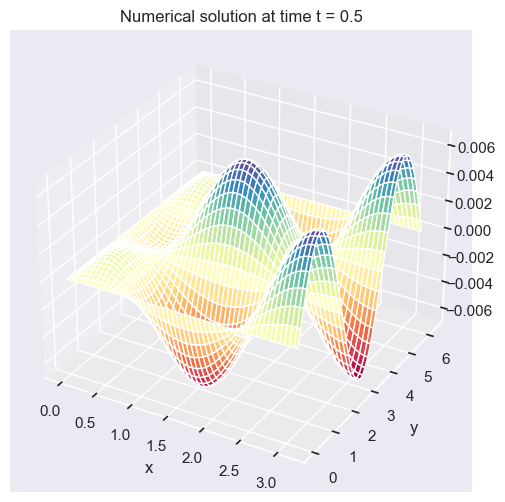

In [45]:
solver = ADI_Solver(N, M, T, x_start, x_end, y_start, y_end, t_start, 1)
solver.solve()

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
x1, y1 = np.meshgrid(solver.x, solver.y)
ax.plot_surface(x1, y1, solver.u[:, :, solver.T], rstride=4, cstride=4, cmap=cm.Spectral)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Numerical solution at time t = {round(solver.tau * solver.T / 2, 2)}')

Text(0.5, 0.92, 'Error graph at t = 0.5')

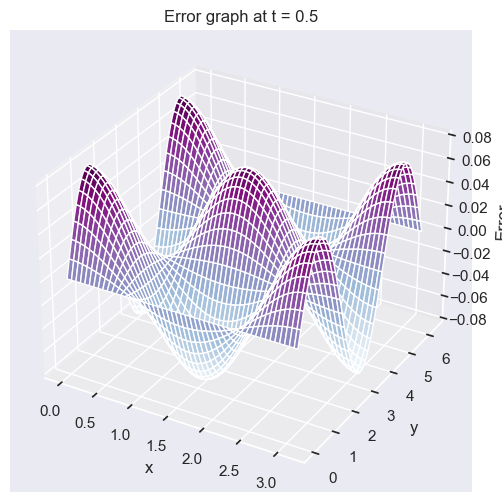

In [48]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
x1, y1 = np.meshgrid(solver.x, solver.y)

ax.plot_surface(x1, y1, u_a[:, :, int(T / 2)] - solver.u[:, :, int(T)], rstride=4, cstride=4, cmap=cm.BuPu)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Error')
ax.set_title(f'Error graph at t = {round(solver.tau * T / 2, 2)}')